# <center>Data cleaning project "Walmart"

<center> Data was taken from https://codefinity.com/

#### In this small project, I will normalize, clean and prepare the data for further analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('walmart', index_col=0)

df.sample(5)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Unemployment
0,1,05.02.2010,1643690-9,0,42.31,8.106
1,1,12.02.2010,1641957-44,1,38.51,8.106
2,1,19.02.2010,1611968-17,0,39.93,8.106
3,1,26.02.2010,1409727-59,0,46.63,8.106
4,1,05.03.2010,1554806-68,0,46.50,8.106
...,...,...,...,...,...,...
6430,45,28.09.2012,713173-95,0,64.88,8.684
6431,45,05.10.2012,733455-07,0,64.89,8.667
6432,45,12.10.2012,734464-36,0,54.47,8.667
6433,45,19.10.2012,718125-53,0,56.47,8.667


In [41]:
# Delete NaN values
df.dropna(inplace=True)

df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Unemployment    0
dtype: int64

In [42]:
# Convert column 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

df['Date'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [43]:
# Convert 'Temperature' to Celsius
df['Temperature'] = df['Temperature'] * (5/9) - 32

df.rename(columns = {'Temperature': 'Temp_Celsius'} , inplace = True )

# Output the minimum of the column 'Temp_Celsius'
print(df['Temp_Celsius'].min())

-27.855555555555554


In [44]:
def separator(data, column_name):
    data[column_name] = data[column_name].str.replace('-' , '.')
    data[column_name] = data[column_name].astype(float)

# Apply function to required column
separator(df, 'Weekly_Sales')

print(df['Weekly_Sales'].tail(5))

6430    713173.95
6431    733455.07
6432    734464.36
6433    718125.53
6434    760281.43
Name: Weekly_Sales, dtype: float64


The mean value is 1.7772333368066426
The median is 2.9250000000000007
The mode is 0   -3.983333
Name: Temp_Celsius, dtype: float64
The variance is 104.25545192651259
The standart deviation is 10.210555906830567


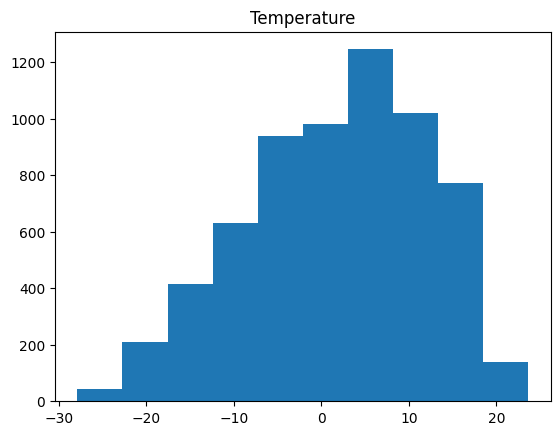

In [45]:
# let's work with basic statistics

# Find the mean
mean = df['Temp_Celsius'].mean()

# Find the median
median = df['Temp_Celsius'].median()

# Find the mode
mode = df['Temp_Celsius'].mode()

# Find the standard deviation
std = df['Temp_Celsius'].std()

# Find the variance
variance = df['Temp_Celsius'].var()

print("The mean value is", mean)
print("The median is", median)
print("The mode is", mode)
print("The variance is", variance)
print("The standart deviation is", std)

fig, ax = plt.subplots()

ax.hist(df["Temp_Celsius"])

plt.title("Temperature")
plt.show()

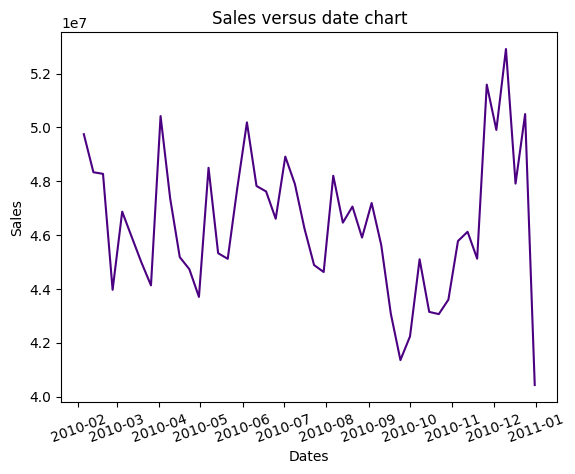

In [63]:
sales_by_date = df.groupby('Date').agg({'Weekly_Sales':'sum'})
data_2010 = sales_by_date[sales_by_date.index.year == 2010]

fig, ax = plt.subplots()

ax.plot(data_2010.index, data_2010['Weekly_Sales'], linestyle ='solid', color='indigo')

ax.set_ylabel('Sales')
ax.set_xlabel('Dates')
plt.xticks(rotation=20)
plt.title('Sales versus date chart')

plt.show()

#### Suppose we can recognize the relationship between holidays and an increasing amount of sales. Later in the year, people spend more money due to Christmas and New Year.

We figured out that on holidays people become generous, and they are eager to spend more money. 
However, it's still only our assumption .

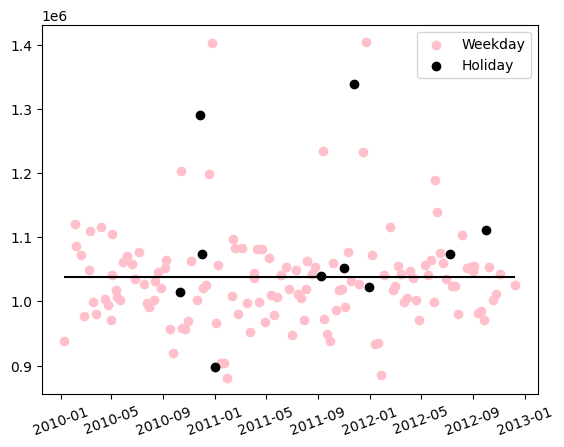

In [98]:
df_sample = pd.read_csv('walmart2')

df_sample['Date'] = pd.to_datetime(df_sample['Date'])
mean_sample = df_sample['Weekly_Sales'].mean()

fig, ax = plt.subplots()

colors = ["pink", "black"]

# Extract unique values from the column 'Holiday_Flag'
holidays = df_sample['Holiday_Flag'].unique()

for i in range(len(colors)):
        indices = df_sample['Holiday_Flag'] == holidays[i]

        ax.scatter(df_sample[indices]['Date'], df_sample[indices]['Weekly_Sales'],
                    c = colors[i], label = holidays[i])
        
#let's display mean value of purchases on the chart        
ax.hlines(mean_sample, min(df_sample['Date']), max(df_sample['Date']), color='black')
plt.xticks(rotation=20)
       
plt.legend(['Weekday','Holiday'])

plt.show()

It can be recognized, that the greatest purchases were made on holidays, I suppose it is related to winter ones.
#### But, of course, the exact answer can only be given to us by checking the statistical hypothesis.

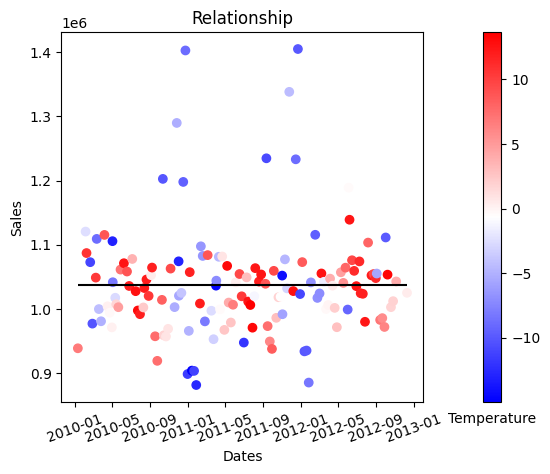

In [99]:
fig, ax = plt.subplots()

plot = ax.scatter(df_sample['Date'], df_sample['Weekly_Sales'], c = df_sample['Temp_Celsius'], cmap = 'bwr')

ax.set(xlabel = 'Dates', ylabel = 'Sales', title = 'Relationship')

#let's display mean value of purchases on the chart
ax.hlines(mean_sample, min(df_sample['Date']), max(df_sample['Date']), color='black')
plt.xticks(rotation=20)

legend = fig.colorbar(plot, pad=0.12)
legend.ax.set_xlabel("Temperature")

plt.show()

The average amount of weekly sales is the greatest when the temperature is low, it is usually observed in winter. Our previous assumption is correct: people want to buy the whole store on New Year and Christmas.

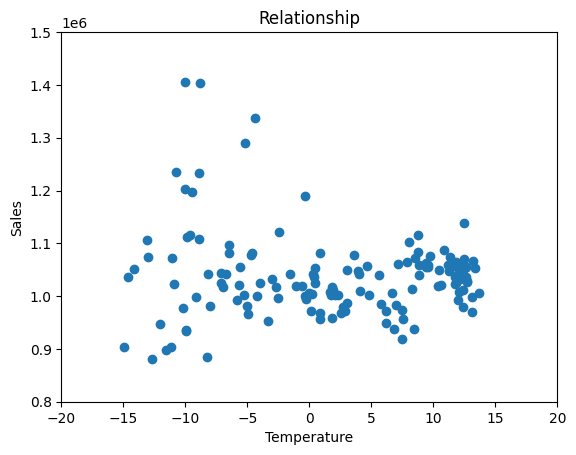

In [55]:
fig, ax = plt.subplots()

ax.scatter( df5['Temp_Celsius'] , df5['Weekly_Sales'])

ax.set(xlabel='Temperature', ylabel = 'Sales',
         title = 'Relationship' , xlim=[-20,20], ylim =[0.8e6, 1.5e6])

plt.show()

In the plot, we can see a simple relationship: when the temperature is low people do not want to go outside and buy a lot, but there are some exceptions. We can point out that the sales with the greatest number were made when the temperature was low too. This fact can prove our assumption about the winter holidays.

In [56]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temp_Celsius,Unemployment
Store,1.000000,0.706496,0.154632,-0.248403,0.133142
Weekly_Sales,0.706496,1.000000,0.180271,-0.097645,-0.005886
Holiday_Flag,0.154632,0.180271,1.000000,-0.189346,0.049301
Temp_Celsius,-0.248403,-0.097645,-0.189346,1.000000,-0.179339
Unemployment,0.133142,-0.005886,0.049301,-0.179339,1.000000


#### Looking at the correlation table, we see that there is a weak correlation between purchases and weekends.